In [ ]:
!pip install gurobipy

# Markdown Game Strategy

Finding the optimal strategy for the markdown game

In [6]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
sns.set_style("whitegrid")

## Explore the dataset that is provided to us

In [7]:
df = pd.read_excel("Sales-Data.xlsx")

In [8]:
df.head()

,Item,Week,Price,Sales,Remaining Inventory
0,1,1,60,57,1943
1,1,2,60,98,1845
2,1,3,60,55,1790
3,1,4,60,41,1749
4,1,5,60,60,1689


Number of sales depending on the price

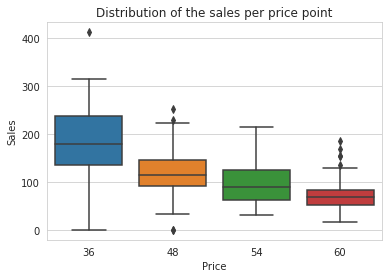

In [9]:
sns.boxplot(x=df.Price, y=df.Sales)
plt.title("Distribution of the sales per price point")
plt.show()

Same thing but looking at histogram

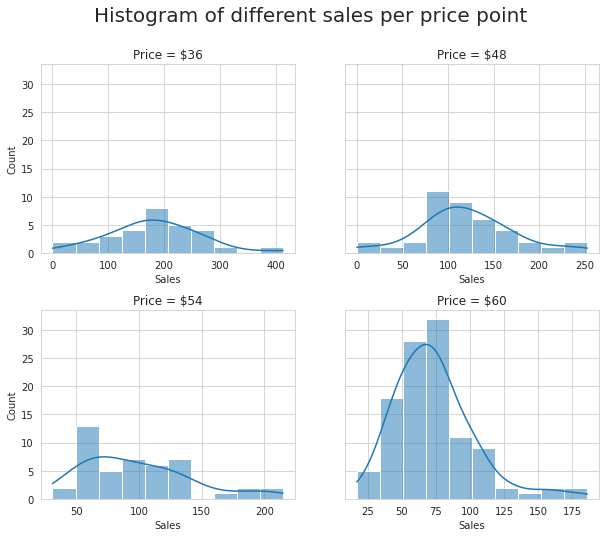

In [10]:
fig, axes = plt.subplots(2,2, figsize=(10, 8), sharey=True)
axes = axes.flatten()
fig.suptitle("Histogram of different sales per price point", fontsize=20)
i=0
for price in [36, 48, 54, 60]:
    sns.histplot(ax=axes[i], x=df.loc[df.Price==price].Sales, bins=10, kde=True)
    axes[i].set_title("Price = $" + str(price))
    i+=1
fig.subplots_adjust(hspace=0.3)

Checking how the week# influences the number of sales

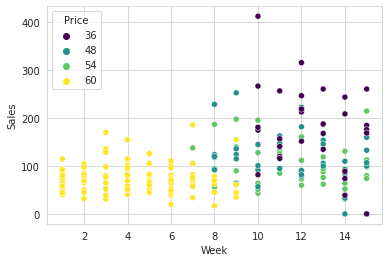

In [11]:
sns.scatterplot(x=df.Week, y=df.Sales, hue=df.Price, palette="viridis")
plt.show()

How does the first week of sales dictates the other weeks?

In [12]:
# Add a column first week sale
first_sales = list(df.Sales.loc[df.groupby("Item").cumcount().eq(0)])
i = list(df.Item.unique())

mapping = {i+1: value for i, value in enumerate(first_sales)}
df["first_sale"] = df.Item.map(mapping)

df.head()

,Item,Week,Price,Sales,Remaining Inventory,first_sale
0,1,1,60,57,1943,57
1,1,2,60,98,1845,57
2,1,3,60,55,1790,57
3,1,4,60,41,1749,57
4,1,5,60,60,1689,57


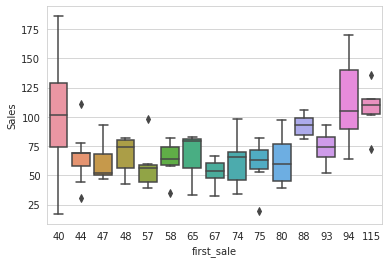

In [13]:
# Plot the result (only when the price is 60)
sns.boxplot(x=df["first_sale"].loc[df.Price==60], y=df.Sales.loc[df.Price==60])
plt.show()

How about the first two sales

In [14]:
first2_sales = list(2000-df["Remaining Inventory"].loc[df.groupby("Item").cumcount().eq(1)])
i = list(df.Item.unique())


mapping = {i+1: value for i, value in enumerate(first2_sales)}
df["first2_sale"] = df.Item.map(mapping)

df.head()

,Item,Week,Price,Sales,Remaining Inventory,first_sale,first2_sale
0,1,1,60,57,1943,57,155
1,1,2,60,98,1845,57,155
2,1,3,60,55,1790,57,155
3,1,4,60,41,1749,57,155
4,1,5,60,60,1689,57,155


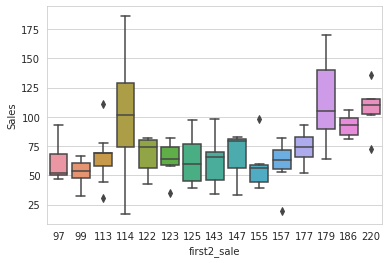

In [15]:
# Plot the result (only when the price is 60)
sns.boxplot(x=df["first2_sale"].loc[df.Price==60], y=df.Sales.loc[df.Price==60])
plt.show()

There might be some correlation using the first weeks of sales but unclear with the number of data points that we have.  We can see that when the Total Sales after two weeks are above 160, there seems to be some correlation that indicates the median sale will be much higher than for the other.

## Calculating correlations
using linear regression models

### Linear model with sales over price

In [16]:
import statsmodels.formula.api as smf
lm1 = smf.ols(data=df, formula="Sales ~ Price").fit()
print(lm1.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     128.6
Date:                Mon, 09 May 2022   Prob (F-statistic):           7.74e-24
Time:                        01:22:30   Log-Likelihood:                -1186.1
No. Observations:                 225   AIC:                             2376.
Df Residuals:                     223   BIC:                             2383.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    334.9640     20.863     16.055      0.0

### With price and week

In [17]:
lm2 = smf.ols(data=df, formula="Sales ~ Price+Week").fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     66.36
Date:                Mon, 09 May 2022   Prob (F-statistic):           2.56e-23
Time:                        01:22:30   Log-Likelihood:                -1184.6
No. Observations:                 225   AIC:                             2375.
Df Residuals:                     222   BIC:                             2385.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    386.0742     36.266     10.646      0.0

In [18]:
import statsmodels.formula.api as smf
lm2 = smf.ols(data=df, formula = "Sales ~ Price * Week").fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     47.16
Date:                Mon, 09 May 2022   Prob (F-statistic):           1.35e-23
Time:                        01:22:30   Log-Likelihood:                -1181.7
No. Observations:                 225   AIC:                             2371.
Df Residuals:                     221   BIC:                             2385.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    643.7429    112.455      5.724      0.0

The third regression gives the best results.

In [19]:
# Get the coefficients
lm2.params

Intercept     643.742885
Price          -9.450952
Week          -23.861872
Price:Week      0.381639
dtype: float64

## Static Markdown Optimization
We optimize the problem in advance, not requiring to update based on the results we are seeing.
This is an approach that requires less computing power and can serve as a baseline for comparison for dynamic approaches.

Here, we want to optimize the total revenues

Start by creating 4 revenue formulas based on the 4 price points.
Y is the revenues generated at each price point and week#

In [20]:
y = np.zeros((4,4))
p = list(df.Price.unique())
y= np.array(lm2.params)
print(y)

[ 6.43742885e+02 -9.45095190e+00 -2.38618716e+01  3.81639277e-01]


In [21]:
!pip install gurobipy

In [22]:
import gurobipy as gp
from gurobipy import GRB

In [114]:
model = gp.Model("linear_model")

In [115]:
# Decision variable
n_weeks = 15
# i price point and j weeks
X = model.addVars(4,n_weeks, vtype=GRB.BINARY, name="X")
S = model.addVar(1, name="Sales")

In [116]:
week = list(range(1,16))
sales = gp.quicksum(
    X[i,j]*(y[0] + y[1]*p[i] + (y[2]+y[3]*p[i])*week[j]) for i in range(4) for j in range(n_weeks)  # using the linear regression results
)
revenue = gp.quicksum(
    p[i]*X[i,j]*(y[0] + y[1]*p[i] + (y[2]+y[3]*p[i])*week[j]) for i in range(4) for j in range(n_weeks)  # using the linear regression results
)

model.setObjective(revenue, sense=GRB.MAXIMIZE)

In [117]:
# Constraints
# 1 week selected
model.addConstrs((gp.quicksum(X[i,j] for i in range(4)) <= 1 for j in range(15)), name="PriceStratEachWeek")

# Maximum sales of 2000
model.addConstr(S == sales)
model.addConstr(0<=2000-sales, name="MaxSales")

# First week is full price
model.addConstr(X[0,0] == 1, name="FirstWeekFullPrice")

# Sub-sequent weeks cannot have price (based on index) lower than the current one
for j in range(1, n_weeks):
  for i in range(1, 4):
    model.addConstr(X[i-1, j-1] <= (gp.quicksum(X[k, j] for k in range(i-1, 4))), name=f"SubsequentPriceConstraint_i_j")

In [118]:
model.optimize()

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (linux64)
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 60 rows, 61 columns and 350 nonzeros
Model fingerprint: 0x2634760e
Variable types: 1 continuous, 60 integer (60 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+02]
  Objective range  [4e+03, 1e+04]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+03]
Presolve removed 6 rows and 5 columns
Presolve time: 0.00s
Presolved: 54 rows, 56 columns, 267 nonzeros
Variable types: 0 continuous, 56 integer (56 binary)
Found heuristic solution: objective 96518.974965

Root relaxation: objective 9.822794e+04, 29 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 98227.9405    0   28 96518.9750 98227.9405  1.77%     -    0s
     0     0 97919.2944    0   25 96518.9750

In [119]:
print(f"Average Revenue to be Expected = {model.objVal}")
res=[]
for v in model.getVars():
    if v.x>0:
        res.append(v.varName+ " = " + str(v.x))
for i in sorted(res):
  print(i)

Average Revenue to be Expected = 97234.8794544416
Sales = 1975.4815646603392
X[0,0] = 1.0
X[1,1] = 1.0
X[1,2] = 1.0
X[2,10] = 1.0
X[2,11] = 1.0
X[2,12] = 1.0
X[2,13] = 1.0
X[2,14] = 1.0
X[2,3] = 1.0
X[2,4] = 1.0
X[2,5] = 1.0
X[2,6] = 1.0
X[2,7] = 1.0
X[2,8] = 1.0
X[2,9] = 1.0


In [120]:
print(f"Average Revenue to be Expected = {model.objVal}\n")
res={}
i=0
for v in model.getVars():
    if v.x==1:
        res[int(v.varName[2:-1].split(',')[-1])] = f"""Price: {p[int(v.varName[2:-1].split(',')[0])]}"""
        i+=1
res

Average Revenue to be Expected = 97234.8794544416



{0: 'Price: 60',
 1: 'Price: 54',
 2: 'Price: 54',
 3: 'Price: 48',
 4: 'Price: 48',
 5: 'Price: 48',
 6: 'Price: 48',
 7: 'Price: 48',
 8: 'Price: 48',
 9: 'Price: 48',
 10: 'Price: 48',
 11: 'Price: 48',
 12: 'Price: 48',
 13: 'Price: 48',
 14: 'Price: 48'}

In [97]:
print(f"Average Revenue to be Expected = {model.objVal}\n")

for v in model.getVars():
    if v.x>0:
        print(v.varName, "=", v.x)

Average Revenue to be Expected = 98477.07449487424

X[0,0] = 1.0
Sales = 75.72225635006771
X[0,0] = 1.0
X[1,11] = 1.0
X[1,12] = 1.0
X[1,14] = 1.0
X[2,1] = 1.0
X[2,2] = 1.0
X[2,3] = 1.0
X[2,4] = 1.0
X[2,5] = 1.0
X[2,6] = 1.0
X[2,7] = 1.0
X[2,8] = 1.0
X[2,9] = 1.0
X[2,10] = 1.0
X[2,13] = 1.0
Sales = 1998.9201015131844


In [96]:
p

[60, 54, 48, 36]